**Übung Mustererkennung** *WS 2022/23* -- *K. Brandenbusch,  Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
___
# Aufgabe 9: Perzeptron

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
import sys
if '..' not in sys.path:
    sys.path.append('..')

---
## Theorie

In dieser Aufgabe geht es um die Klassifikation mit neuronalen Netzen.<br>
Der Grundbaustein eines neuronalen Netzes ist das Neuron.
Ein Neuron besteht aus:
- Gewichten $\large \omega_1, \dots, \omega_n$
- einem Bias $\large \omega_0$
- einer Aktivierungsfunktion $\large \Theta$

![Perzeptron](./perceptron.jpg)

Wie auf der Abbildung illustriert ist, berechnet ein Neuron für eine Eingabe $ \large \underline x = (x_1, \dots, x_n)^T$ zunächst die Erregung 

$$
    \large y = \sum_{i=0}^n \omega_i x_i.
$$

Anschließend wird die Ausgabe des Neurons durch die Erregung $y$ und die Akivierunsfunktinon $\Theta$ bestimmt.

$$
    \large u = \Theta(y).
$$

Gängige Aktivierungsfunktionen sind:
* die Schwellwertfunktion $\large \Theta_s(y) = \begin{cases} 1 \text{ falls } y \geq 0 \\ 0 \text{ sonst } \end{cases} $
* der Tangens hyperbolicus $\large \Theta_t(y) = \tanh(y) = \frac{e^y - e^{-y}}{e^y + e^{-y}}$
* die Sigmoidfunktion $\large \Theta(y) = \frac{1}{1+e^{\alpha y}}$
* die Recitified Linear Unit (ReLU) $\large \Theta_r(y) = \max(0, y)$




In dieser Aufgabe sollen Sie ein einschichtiges (keine Hidden Layer) neuronales Netz zur Klassifikation auf dem `data2d` Datensatz ($n=2$) verwenden.

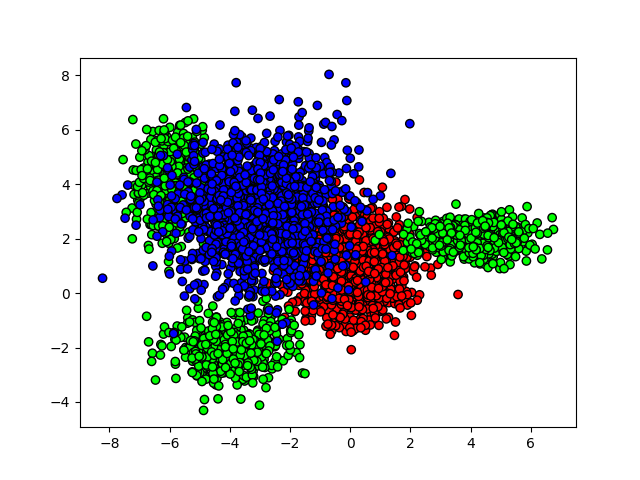

In [2]:
from common.data_provider import DataProvider
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

train_data_provider = DataProvider(DataProvider.DATA2DROOT_TRAIN)
test_data_provider = DataProvider(DataProvider.DATA2DROOT_TEST)

colors = np.array(['#F00', '#0F0', '#00F'])
train_data, train_labels = train_data_provider.get_dataset_and_labels()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_data[:, 0], train_data[:, 1], c=colors[train_labels.astype(int)], edgecolor='k', zorder=1)

plt.show()

Überlegen Sie zunächst welche Klassifikationsprobleme sich mit dieser Netzwerk-Topologie lösen lassen und wählen Sie den Trainings- und Testdatensatz entsprechend.
Extrahieren Sie die Klassen, die sich entsprechend der Netzwerk-Topologie für die Aufgabe trennen lassen und visualisieren Sie diese erneut.

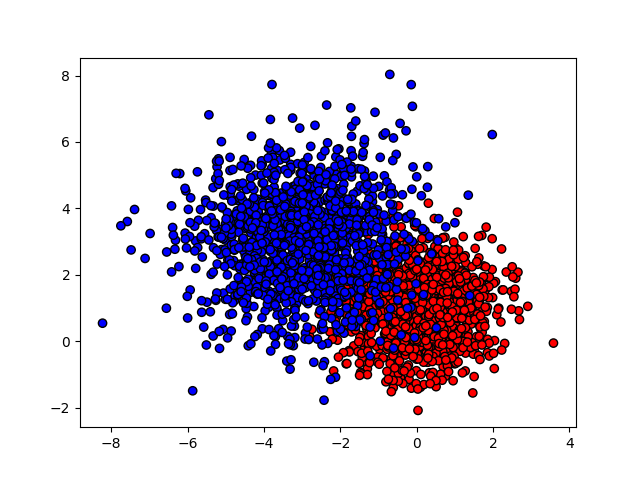

In [3]:
colors = np.array(['#F00', '#0F0', '#00F'])
train_data, train_labels = train_data_provider.get_dataset_and_labels(('0','2'))
test_data, test_labels = train_data_provider.get_dataset_and_labels(('0','2'))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_data[:, 0], train_data[:, 1], c=colors[train_labels.astype(int)], edgecolor='k', zorder=1)

plt.show()

---
## Implementierung

Wie die anderen Klassifikatoren, die Sie im Laufe der Übung kennengelernt haben, besitzt auch die Klasse `NeuralNetwork` im Modul [`common.classification`](../common/classification.py) einen Konstruktor (`__init__`) und die Methoden `estimate` und `classify`. Der Konstruktor initialisiert die notwendige Komponenten des Klassifikators. Die Methode `estimate` schätzt die Parameter des Klassifikators (hier die Gewichte) und die Methode `classify` führt die Inferenz durch (hier ein _forward pass_).

In dieser Aufgabe ist es Ihnen selbst überlassen ob Sie, wie zuvor, die Bestandteile des Klassifikators iterativ über Zellen im Notebook implementieren oder direkt die entsprechenden Methoden mit Inhalt füllen.

### Konstruktor
Implementieren sie zunächst den Konstruktor der Klasse `NeuralNetwork` im Modul [`common.classification`](../common/classification.py).


Nutzen Sie für die Umsetzung der Aktivierungsfunktionen und ihrer Ableitungen `lambda` Funktionen.
Eine kurze Erklärung zu `lambda`-Funktionen finden Sie [hier](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).


Initialisieren Sie eine Liste um den Root Mean Squared Error (RMSE) und die berechneten Gewichte für jede Iteration abzuspeichern.
Diese können genutzt werden um die Zwischenergebnisse des Trainings zu visualisieren.
In der Praxis ist das so detailierte Nachverfolgen des Trainings über jede Iteration nicht praktikabel.
Da unser Spielbeispiel simpel ist benötigen wir auch nicht viele Gewichte und können diese problemlos mitspeichern.




In [4]:
from common.classification import NeuralNetwork

nn = NeuralNetwork(learning_rate=0.05, iterations=10, activation='Linear')

### Training

Implementieren Sie nun die Methode `NeuralNetwork.estimate`.

In jeder Iteration berechnet des Netz dabei zunächst die Ausgabe für die aktuellen Gewichte.
Mithilfe der Labels wird anschließend der Fehler zwischen der Ausgabe und den Labels berechnet.  
Als Fehlermaß verwenden wir hier den Mittleren quadratischen Fehler (Root Mean Squared Error)

Letzlich werden die Gewichte durch die Ableitung des Fehlers korrigiert ehe die nächste Iteration von vorne beginnt.

_Hinweis_: Achten Sie darauf, dass die Übergabe des Bias (zusätzlicher Input für $x_0$) impliziert wird. Er existiert also nicht in den Daten und soll in der Methode vor die eigentliche Eingabe "gehangen" werden.

In [5]:
nn.estimate(train_data, train_labels)



Iteration: 0
mean squared error: 5.111618572727319
[1 1 1]


### Inferenz

Implementieren Sie schließlich die Methode `NeuralNetwork.classify`. Diese führt einen _forward pass_ aus, wobei wie oben beschrieben die gelernten Gewichte mit den Eingaben multipliziert und die Aktivierungsfunktion angewandt wird.

In [6]:
nn_result_labels = nn.classify(test_data, iteration=100)

NotImplementedError: 

---
## Evaluation
Evaluieren Sie nun Ihr trainiertes Netz.

Nutzen Sie dazu den bekannten `ClassificationEvaluator` im Modul [`common.classification`](../common/classification.py).

In [ ]:
from common.classification import ClassificationEvaluator


Plotten Sie außerdem die Entwicklung des Fehlers.



In dem Modul [`common.visualisazion`](../common/visualization.py) finden Sie die Methode `plot_hyperplane`. Nutzen Sie diese um ausgewählte Zwischenergebnisse nebeneinander in subplots (vgl. Examples in [`fig.add_subplots`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)) darzustellen.

---
Diskutieren Sie anschlie0end folgende Fragen:

- Welche Eigenschaften hat ein neuronales Netz mit dem sich beliebige 2-Klassenprobleme auf dem `data2d` Datensatz lösen lassen? 
- Wie wuerde man ein solches Netz fuer die Lösung des 3-Klassenproblems erweitern?


**Optional:**
- Implementieren Sie ein neuronales Netz, mit dem sich beliebige 2-Klassenprobleme auf dem `data2d` Datensatz lösen lassen.
- Visualisieren Sie den Trainingprozess.
- Erweitern Sie Ihr Netz zur Lösung des 3-Klassenproblems.